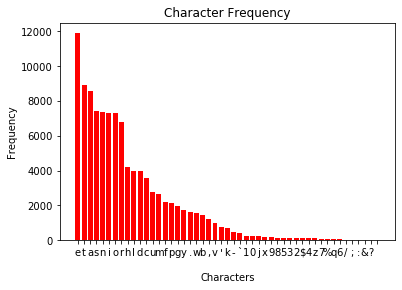

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
myfile = open('1200wsj.txt') 
mystring = myfile.read() 
lowerstr = mystring.lower() 
characters = list(lowerstr) #makes list of characters
lettercount = {} 
for w in characters: #counts letters    
    if w in lettercount:        
        lettercount[w] += 1   
    else:        
        lettercount[w] = 1

del lettercount[" "] #deletes spaces from lettercount
sorted_dic = {k: v for k, v in sorted(lettercount.items(), key=lambda item: item[1],reverse=True)}

keys = sorted_dic.keys()
values = sorted_dic.values()
plt.bar(keys, values,color = 'red')
plt.title("Character Frequency")
plt.xlabel("Characters")
plt.ylabel("Frequency")
plt.show()



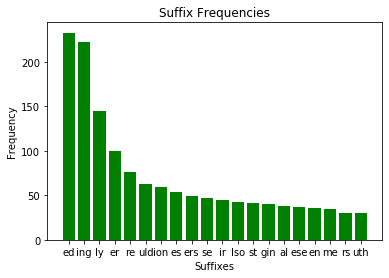

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
myfile = open('1200wsj.txt') #open file
mystring = myfile.read() #read file into massive string
lowerstr = mystring.lower() #makes string lower case
split_string  = lowerstr.split() #splits string at white spaces
filteredList = list(filter(lambda x : len(x) >= 4 , split_string)) #filters list, leaves words with 4 or more characters
t = len(filteredList) #length of filtered list for later while loop 
suffix_two = []  #list of possible two letter suffixes
suffix_three = [] #list of possible three letter suffixes
wordcounts = {} #dictionary of words in text 
for w in split_string:  #makes dictionary of all words along with frequency  
    if w in wordcounts:       
        wordcounts[w] += 1    
    else:        
        wordcounts[w] = 1

def splitter_two(t):  # function splitting words into characters to seperate 2 letter suffixes
    characters = list(t)  #splits word into characters makes it a list
    characters_unsuffixed = [] #list for actual words without suffix
    i = 0
    while(i < len(characters)-2): #makes word without suffix, lenght minus two to make sure it doesn't get suffix
        characters_unsuffixed.append(characters[i]) #adds characters to unsuffixed word list
        i += 1
    back_word = "".join(characters_unsuffixed) #joins unsuffixed list into string 
    one = characters[len(t)-1] #one letter of suffix
    two = characters[len(t)-2] #second letter of suffix
    three = two + one #joins one and two to make suffix string
    check(back_word,three) #calls function to check if suffix or not

def splitter_three(t): #same thing as splitter_two but just for three letter suffixes
    characters = list(t) 
    characters_unsuffixed_two = []
    i = 0
    while(i < len(characters)-3):
        characters_unsuffixed_two.append(characters[i])
        i += 1
    back_word = "".join(characters_unsuffixed_two)
    one = characters[len(t)-1]
    two = characters[len(t)-2]
    three = characters[len(t)-3]
    four =three + two + one
    check_two(back_word,four) #calls function check two

def check(s,a): #function for two letter suffix check
    if s in wordcounts: #checks if words s, is in dictionary wordcounts
        suffix_two.append(a)#if word "s" is in dictionary, it appends suffix "a" into list             
    else: 
        return #exits if not
def check_two(s,a):#function for three letter suffix check
    if s in wordcounts:
        suffix_three.append(a)#if word "s" is in dictionary, it appends suffix "a" into list    
    else:
        return
i = 0
while (i < t): #goes through all words in text file
    word = filteredList[i] #makes word it is on into a 'word'
    splitter_two(word) #sends word to function
    splitter_three(word) #sends word to other function
    i += 1

suffix_count = {} #dictionary for two letter suffixes
suffix_counts = {} #dictionary for three letter suffixes
for w in suffix_two:    #counts how many times suffix was in list
    if w in suffix_count:       
        suffix_count[w] += 1    
    else:        
        suffix_count[w] = 1
for w in suffix_three: #counts how many times suffix was in list
    if w in suffix_counts:       
        suffix_counts[w] += 1    
    else:        
        suffix_counts[w] = 1
suffix_count.update(suffix_counts) #joins two letter suffix dict with three letter suffix
suffix_counted = {k: v for k, v in sorted(suffix_count.items(), key=lambda item:item[1],reverse = True)}
#^^sorts list by value, reversed
filtered_dict = dict(filter(lambda item: item[1] >=30  , suffix_counted.items())) #filters dicitonary to only make 20 values
keys = filtered_dict.keys() #makes keys to plot
values = filtered_dict.values() #makes values to plot
plt.bar(keys, values, color = 'g') #bar graph in green
plt.xlabel("Suffixes")
plt.ylabel("Frequency")
plt.title("Suffix Frequencies")
plt.show()
